<h3 align="center">Outliers (or Outliars?!)</h3>

![](https://miro.medium.com/max/1400/1*-mnl6wOE21tCiQG-nDFVdg.png) 

# Exercise 1

Create box plots on a single set of axes for all five experiments in the morley data set.

In [23]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

In [24]:
# choose where we pull the dataset from.
data = np.genfromtxt('data_sets/morley.csv', skip_header=1, delimiter=',', deletechars='"')

In [25]:
print(data.dtype)

float64


In [26]:
# ignore the useless info from the dataset. 
data = data[:,1:]

In [27]:
# create the 5 different 'samples' representing the 5 experiments.
sample_1 = data[:20,2]
sample_2 = data[21:40,2]
sample_3 = data[41:60,2]
sample_4 = data[61:80,2]
sample_5 = data[81:100,2]

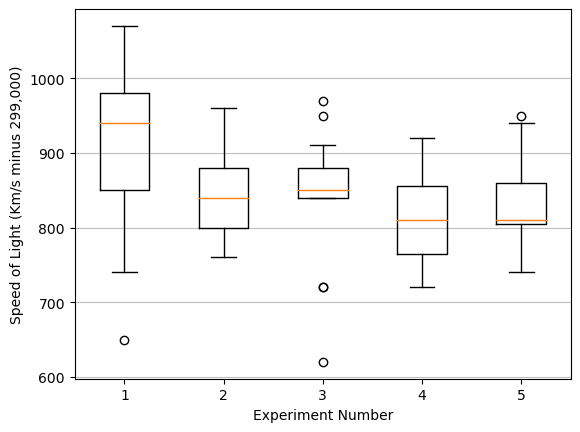

In [28]:
# plot the boxplot with all 5 in it.
fig, ax = plt.subplots()

# set dtype to 'object' to remove annoying red error box
plt.boxplot(np.array([sample_1,sample_2,sample_3,sample_4,sample_5], dtype=object))
# add a nice grid to make the distinction between the values even clearer.
ax.yaxis.grid(True, linestyle='-', which='major', color='grey', alpha=0.5)
# add x and y labels for easy reference.
ax.set_xlabel("Experiment Number")
ax.set_ylabel('Speed of Light (Km/s minus 299,000)');

# Exercise 2

Create box plots for all of the numercial variables in Fisher's Iris Data Set.


In [29]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#give program location of dataset and ask it to ignore the first column of info (which is just numbers in sequence from 0 to 149).
iris_data = np.genfromtxt('data_sets/iris.csv', skip_header=1, delimiter=',', deletechars='"')

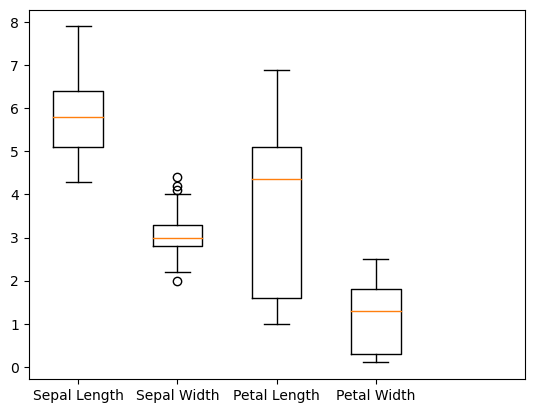

In [30]:
# plot boxplot
fig, ax = plt.subplots()
plt.boxplot(iris_data)
#add labels to x axis
plt.xticks([1,2,3,4],['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width'])
plt.show()

## Exercise 3

Adapt the code and plots so that the overall plot is inversely propertional and the individual groups are directly proportional.

In [31]:
# Create a series of x vectors.
xs = np.array([np.linspace(i, i + 2.0, 20) for i in range(10)])

In [32]:
# Create a corresponding series of y vectors.
ys = np.array([-1.0 * xs[i] + 2 * i for i in range(len(xs))])


In [33]:
# Create global list of x and y values.
x = xs.flatten()
y = ys.flatten()

In [34]:
# Best fit line slope and y intercept.
m, c = np.polyfit(x, y, 1)

In [35]:
# Create a steadily increasing x range for plotting.
xbestfit = np.linspace(x.min(), x.max(), 1000)
# Create corresponding y values form best fit line.
ybestfit = m * xbestfit + c

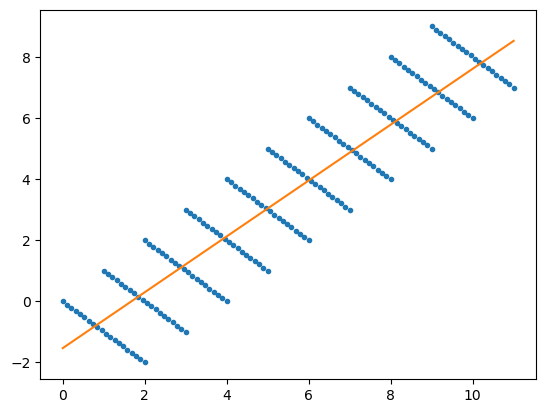

In [36]:
# Plot.
plt.plot(x, y, '.');

# Plot line.
plt.plot(xbestfit, ybestfit);

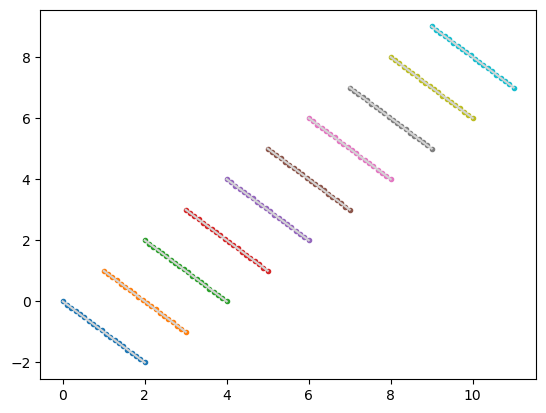

In [37]:
# Same plot but with best fit lines for each category.
for i in range(len(xs)):
    # Plot this category.
    plt.plot(xs[i], ys[i], '.')
    # Fit line to category.
    m, c = np.polyfit(xs[i], ys[i], 1)
    # Create steadily increasing x range for plot.
    xbestfit = np.linspace(xs[i].min(), xs[i].max(), 50)
    # Corresponding y values based on best fit line.
    ybestfit = m * xbestfit + c
    # Plot best fit line for category.
    plt.plot(xbestfit, ybestfit, color='lightgrey');

# References:

[1] https://stackoverflow.com/questions/47528955/adding-a-legend-to-a-matplotlib-boxplot-with-multiple-plots-on-same-axes
[2] https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.boxplot.html 
[3] https://chartio.com/learn/charts/box-plot-complete-guide/
[4] https://thirdspacelearning.com/gcse-maths/ratio-and-proportion/directly-proportional-graph/
[5] https://www.geeksforgeeks.org/numpy-invert-in-python/